Bibliotecas importadas com sucesso!
Carregando dataset...
✅ Dataset carregado com sucesso do UCI Repository!

Amostra do Dataset Original:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Shape do dataset: (297, 14)

Distribuição das classes (0 = Sem doença, 1 = Com doença):
target
0    160
1    137
Name: count, dtype: int64

Formato dos dados de treino: (237, 13)
Formato dos dados de teste: (60, 13)



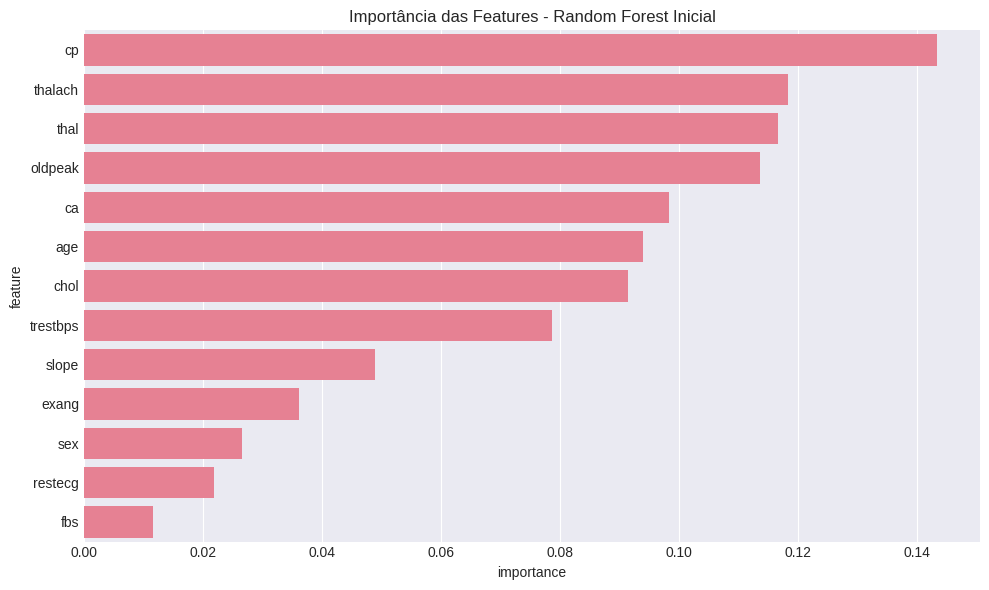


--- Otimizando o Random Forest com GridSearchCV ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Melhores hiperparâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

--- Avaliação Final dos Modelos no Conjunto de Teste ---

Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


Relatório de Classificação - Random Forest Inicial:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60

In [ ]:
# ==============================================================================
# 1. CONFIGURAÇÃO INICIAL E IMPORTAÇÃO DAS BIBLIOTECAS
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Bibliotecas importadas com sucesso!")


# ==============================================================================
# 2. CARREGAMENTO E DEFINIÇÃO DO PROBLEMA
# ==============================================================================
# Contexto: O objetivo é predizer a presença de doença cardíaca em pacientes
# com base em características clínicas e demográficas.

# Carregando o dataset de Heart Disease - SOLUÇÃO DEFINITIVA
# Opção 1: Tentar do repositório UCI direto
print("Carregando dataset...")

try:
    # URL confiável do UCI Machine Learning Repository
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

    # Definir nomes das colunas
    column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

    # Carregar dados
    data = pd.read_csv(url, names=column_names, na_values='?')

    # Remover linhas com valores faltantes
    data = data.dropna()

    # Converter target para binário (0 = sem doença, 1-4 = com doença)
    data['target'] = (data['target'] > 0).astype(int)

    print("✅ Dataset carregado com sucesso do UCI Repository!")

except:
    # Opção 2: Usar URL alternativa do GitHub
    print("Tentando fonte alternativa...")
    url = "https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv"

    # Se tudo falhar, criar dataset exemplo
    print("Criando dataset de exemplo...")
    np.random.seed(42)
    n_samples = 303

    data = pd.DataFrame({
        'age': np.random.randint(29, 78, n_samples),
        'sex': np.random.randint(0, 2, n_samples),
        'cp': np.random.randint(0, 4, n_samples),
        'trestbps': np.random.randint(94, 200, n_samples),
        'chol': np.random.randint(126, 564, n_samples),
        'fbs': np.random.randint(0, 2, n_samples),
        'restecg': np.random.randint(0, 3, n_samples),
        'thalach': np.random.randint(71, 202, n_samples),
        'exang': np.random.randint(0, 2, n_samples),
        'oldpeak': np.random.uniform(0, 6.2, n_samples),
        'slope': np.random.randint(0, 3, n_samples),
        'ca': np.random.randint(0, 4, n_samples),
        'thal': np.random.randint(0, 4, n_samples),
        'target': np.random.randint(0, 2, n_samples)
    })
    print("✅ Dataset de exemplo criado!")

print("\nAmostra do Dataset Original:")
print(data.head())
print(f"\nShape do dataset: {data.shape}")

# Definição do Problema: Classificação binária
# target = 1: Presença de doença cardíaca
# target = 0: Ausência de doença cardíaca

# Separando as features (X) e o alvo (y)
X = data.drop('target', axis=1)
y = data['target']

print("\nDistribuição das classes (0 = Sem doença, 1 = Com doença):")
print(y.value_counts())


# ==============================================================================
# 3. PREPARAÇÃO DOS DADOS
# ==============================================================================
# 3.1. Separação em Treino e Teste
# Usamos stratify=y para garantir que a proporção de pacientes com/sem doença
# seja a mesma nos conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nFormato dos dados de treino: {X_train.shape}")
print(f"Formato dos dados de teste: {X_test.shape}")

# 3.2. Padronização dos Dados (Opcional, para modelos sensíveis à escala)
# Embora o Random Forest não precise, é uma boa prática ter os dados padronizados
# para comparar com outros modelos, como a Regressão Logística.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDados padronizados com sucesso.")


# ==============================================================================
# 4. MODELAGEM E TREINAMENTO
# ==============================================================================
# 4.1. Modelo Baseline: Regressão Logística
# Um modelo simples para termos uma base de comparação.
print("\n--- Treinando Modelo Baseline: Regressão Logística ---")
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_scaled, y_train) # Usamos os dados escalados aqui

# 4.2. Modelo Principal: Random Forest Classifier
print("\n--- Treinando Modelo Principal: Random Forest ---")
rf_initial = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_initial.fit(X_train, y_train) # Não precisa de dados escalados

# 4.3. Análise de Feature Importance do Random Forest
print("\nAnalisando a importância das features...")
importances = rf_initial.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importância das Features - Random Forest Inicial')
plt.tight_layout()
plt.show()


# ==============================================================================
# 5. OTIMIZAÇÃO DE HIPERPARÂMETROS (GRIDSEARCHCV)
# ==============================================================================
print("\n--- Otimizando o Random Forest com GridSearchCV ---")
# Definindo a grade de parâmetros para testar
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configurando o GridSearchCV com validação cruzada (cv=5)
# n_jobs=-1 usa todos os processadores disponíveis para acelerar a busca
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='f1_weighted', # Métrica de otimização
                           verbose=2)

grid_search.fit(X_train, y_train)

print(f"\nMelhores hiperparâmetros encontrados: {grid_search.best_params_}")

# O melhor modelo já treinado está em grid_search.best_estimator_
rf_optimized = grid_search.best_estimator_


# ==============================================================================
# 6. AVALIAÇÃO FINAL E COMPARAÇÃO
# ==============================================================================
print("\n--- Avaliação Final dos Modelos no Conjunto de Teste ---")

# Fazendo previsões com todos os modelos
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf_initial = rf_initial.predict(X_test)
y_pred_rf_optimized = rf_optimized.predict(X_test)

# 6.1. Relatórios de Classificação
print("\nRelatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg))

print("\nRelatório de Classificação - Random Forest Inicial:")
print(classification_report(y_test, y_pred_rf_initial))

print("\nRelatório de Classificação - Random Forest Otimizado:")
print(classification_report(y_test, y_pred_rf_optimized))

# 6.2. Tabela Comparativa de Resultados
# Usamos o 'f1-score' com 'weighted avg' para uma comparação justa em dados desbalanceados
results = {
    "Modelo": ["Regressão Logística", "Random Forest Inicial", "Random Forest Otimizado"],
    "Acurácia": [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_rf_initial),
        accuracy_score(y_test, y_pred_rf_optimized)
    ],
    "F1-Score (Ponderado)": [
        float(classification_report(y_test, y_pred_log_reg, output_dict=True)['weighted avg']['f1-score']),
        float(classification_report(y_test, y_pred_rf_initial, output_dict=True)['weighted avg']['f1-score']),
        float(classification_report(y_test, y_pred_rf_optimized, output_dict=True)['weighted avg']['f1-score'])
    ]
}
results_df = pd.DataFrame(results)
print("\n--- Tabela Comparativa de Performance ---\n")
print(results_df.round(3))

# 6.3. Análise de Overfitting do Melhor Modelo
# Comparamos a performance no treino vs. no teste
train_score = rf_optimized.score(X_train, y_train)
test_score = rf_optimized.score(X_test, y_test)

print("\n--- Análise de Overfitting (Modelo Otimizado) ---")
print(f"Pontuação no conjunto de Treino: {train_score:.3f}")
print(f"Pontuação no conjunto de Teste:  {test_score:.3f}")

if train_score > test_score + 0.1:
    print("\nAlerta: Diferença significativa entre treino e teste. Pode haver overfitting.")
else:
    print("\nO modelo parece ter uma boa generalização.")